# 2. Clustering of writing systems via siamese neural networks

In this notebook we perform a clustering of writing systems using the siamese-based distance.

- Author: ANONYMIZED
- Email: ANONYMIZED
- Date: 02/2024

In [29]:
# packages
import copy
import math
import numpy as np
import os
import pandas as pd
import pickle
import plotly.express as px
import plotly.io as io
import seaborn as sns
from IPython.display import display
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.manifold import MDS

In [30]:
# CHANGE TO YOUR DIRECTORY PATH
path_directory = "YOUR DIRECTORY PATH HERE"

In [31]:
os.chdir(path_directory)
import src.distance_functions as distance_functions

model_name = "siamese"

# Computation of the siamese-based distance between writing systems

- We load the alphabets.

In [27]:
alphabets = os.listdir("data/processed/alphabets/")
alphabets = sorted(alphabets)

print("Number of alphabets:", len(alphabets))
alphabets_short = copy.deepcopy(alphabets)
for i in range(len(alphabets)):
    alphabets_short[i] = alphabets[i][2:-4]

alphabets_short[alphabets_short.index("Ge_ez")] = "Ge`ez"
print("Alphabets", alphabets_short)

Number of alphabets: 51
Alphabets ['Arabic', 'Armenian', 'Avestan', 'Carian', 'Caucasian Albanian', 'Chorasmian', 'Coptic', 'Cypriot', 'Cypro-Minoan', 'Cyrillic', 'Elder Futhark', 'Elymaic', 'Ge`ez', 'Georgian Asomtavruli', 'Georgian Mkhedruli', 'Glagolitic', 'Gothic', 'Greek', 'Hatran Aramaic', 'Hebrew', 'Imperial Aramaic', 'Kharoshthi', 'Latin', 'Linear B', 'Lycian', 'Lydian', 'Mandaic', 'Manichaean', 'Meroitic Cursive', 'Meroitic Hieroglyphs', 'Nabataean', 'Ogham', 'Old Hungarian', 'Old Italic', 'Old North Arabian', 'Old Permic', 'Old Persian', 'Old Sogdian', 'Old South Arabian', 'Old Turkic Orkhon', 'Old Turkic Yenisei', 'Pahlavi Inscriptional', 'Pahlavi Psalter', 'Palmyrene', 'Parthian Inscriptional', 'Phoenician', 'Samaritan', 'Sogdian', 'Syriac', 'Tifinagh', 'Ugaritic']


- We import the siamese-based distance.

In [28]:
similarity_between_languages = distance_functions.similarity_between_languages

- We create the dictionary of distances between the languages.

In [33]:
dict_dist = {}
for i in range(len(alphabets) - 1):
    for j in range(i + 1, len(alphabets)):
        # print(alphabets_short[i], alphabets_short[j])
        alphabet_1 = alphabets[i]
        alphabet_2 = alphabets[j]
        X_glyph_1 = np.load("data/processed/alphabets/" + alphabet_1)
        X_glyph_2 = np.load("data/processed/alphabets/" + alphabet_2)
        dictonary_alphabets = (
            "dict_dist_X_"
            + alphabet_1[2:-4]
            + "_"
            + alphabet_2[2:-4]
            + "_"
            + model_name
            + ".dat"
        )
        dict_dist_loc = pickle.load(
            open(
                "data/processed/distances/between_alphabets/" + dictonary_alphabets,
                "rb",
            )
        )

        sim = similarity_between_languages(X_glyph_1, X_glyph_2, dict_dist_loc)
        dict_dist[(i, j)] = sim
        # print("similarity:", sim)

# Closest and furthest pairs of scripts

- Here are the closest pairs of scripts with respect to the siamese-based distance.

In [34]:
dict_dist_sorted = sorted(dict_dist.items(), key=lambda item: item[1], reverse=False)
for i in range(5):
    print(
        alphabets_short[dict_dist_sorted[i][0][0]],
        alphabets_short[dict_dist_sorted[i][0][1]],
        dict_dist_sorted[i][1],
    )

Old Sogdian Pahlavi Psalter 0.050315434734026596
Meroitic Cursive Old Sogdian 0.05211353529658582
Old Sogdian Palmyrene 0.0780761768852455
Old Sogdian Parthian Inscriptional 0.07967480828966758
Nabataean Palmyrene 0.08095018444439138


- Here are the furthest pairs of scripts with respect to the siamese-based distance.

In [8]:
dict_dist_sorted = sorted(dict_dist.items(), key=lambda item: item[1], reverse=True)
for i in range(5):
    print(
        alphabets_short[dict_dist_sorted[i][0][0]],
        alphabets_short[dict_dist_sorted[i][0][1]],
        dict_dist_sorted[i][1],
    )

Coptic Old Persian 0.8788309936049852
Glagolitic Old Persian 0.8562528030224285
Old Persian Tifinagh 0.8434708869464842
Old Italic Old Persian 0.8090196956583329
Greek Old Persian 0.7981803504518881


- Here are the most isolated scripts in the database of writing systems.

In [9]:
def distance_to_others_languages(i):
    """Computes the distance of a script to all the other scripts."""
    temp = 0
    for j in range(len(alphabets)):
        if j != i:
            temp = temp + dict_dist[(tuple(sorted((i, j))))]
    return temp


dict_dist_others = {}
for i in range(len(alphabets)):
    dict_dist_others[i] = distance_to_others_languages(i)
dict_dist_others = dict(
    sorted(dict_dist_others.items(), key=lambda item: item[1], reverse=True)
)

for i in list(dict_dist_others)[:5]:
    print(alphabets_short[i], dict_dist_others[i])

Old Persian 33.37282932347096
Glagolitic 27.691857794751893
Meroitic Hieroglyphs 26.071554062518896
Ogham 22.040112435379918
Tifinagh 21.480263534457155


# Hierarchical clustering of writing systems

## Ward-linkage hierarchical clustering of writing systems

We perform a Ward-linkage hierarchical clustering of the writing systems together with the siamese-based distance.

In [10]:
sorted_keys, distances = zip(*sorted(dict_dist.items()))
Z = linkage(distances, method="ward")

## Dendrogram
We plot the dendrogram associated to the clustering.

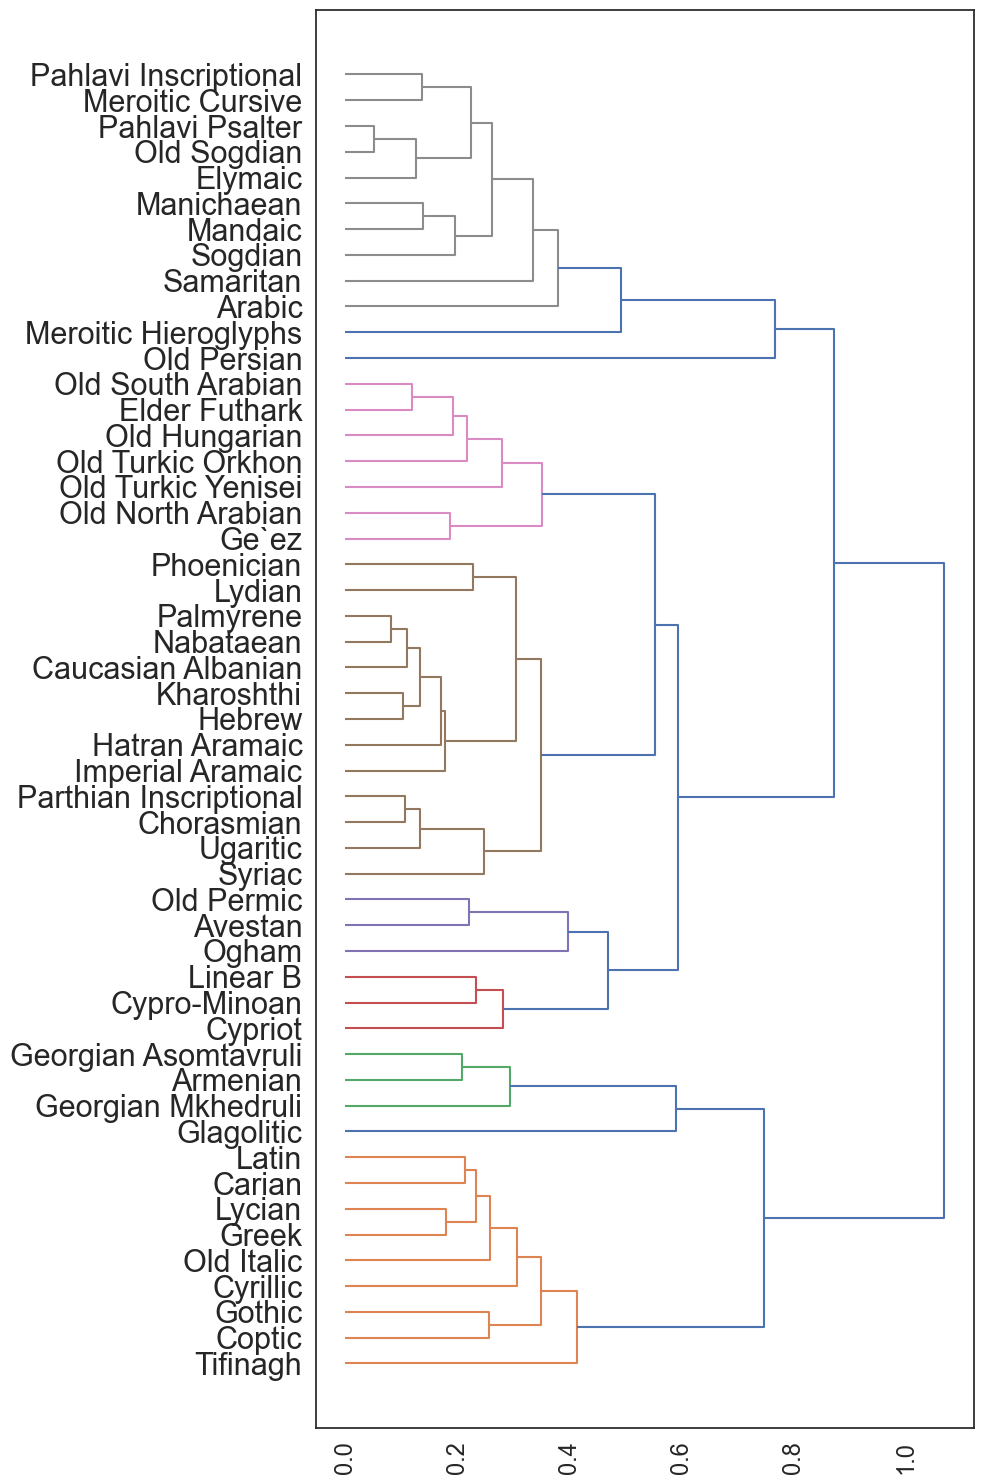

In [35]:
plt.rcParams["figure.figsize"] = [10, 15]
plt.rcParams["figure.autolayout"] = True

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
dendrogram(
    Z,
    ax=ax,
    truncate_mode="lastp",
    p=100,
    show_contracted=True,
    labels=alphabets_short,
    color_threshold=0.45,
    orientation="right",
)

ax = plt.gca()
ax.tick_params(axis="y", which="major", labelsize=22)
ax.tick_params(axis="x", which="major", labelsize=17)
plt.xticks(rotation=90)
plt.autoscale()

# to save
plt.rcParams["savefig.dpi"] = 300
# plt.savefig('export.png', dpi=300, bbox_inches='tight')

plt.show()

## Elbow method
We compute and plot the explained variation of the clustering.

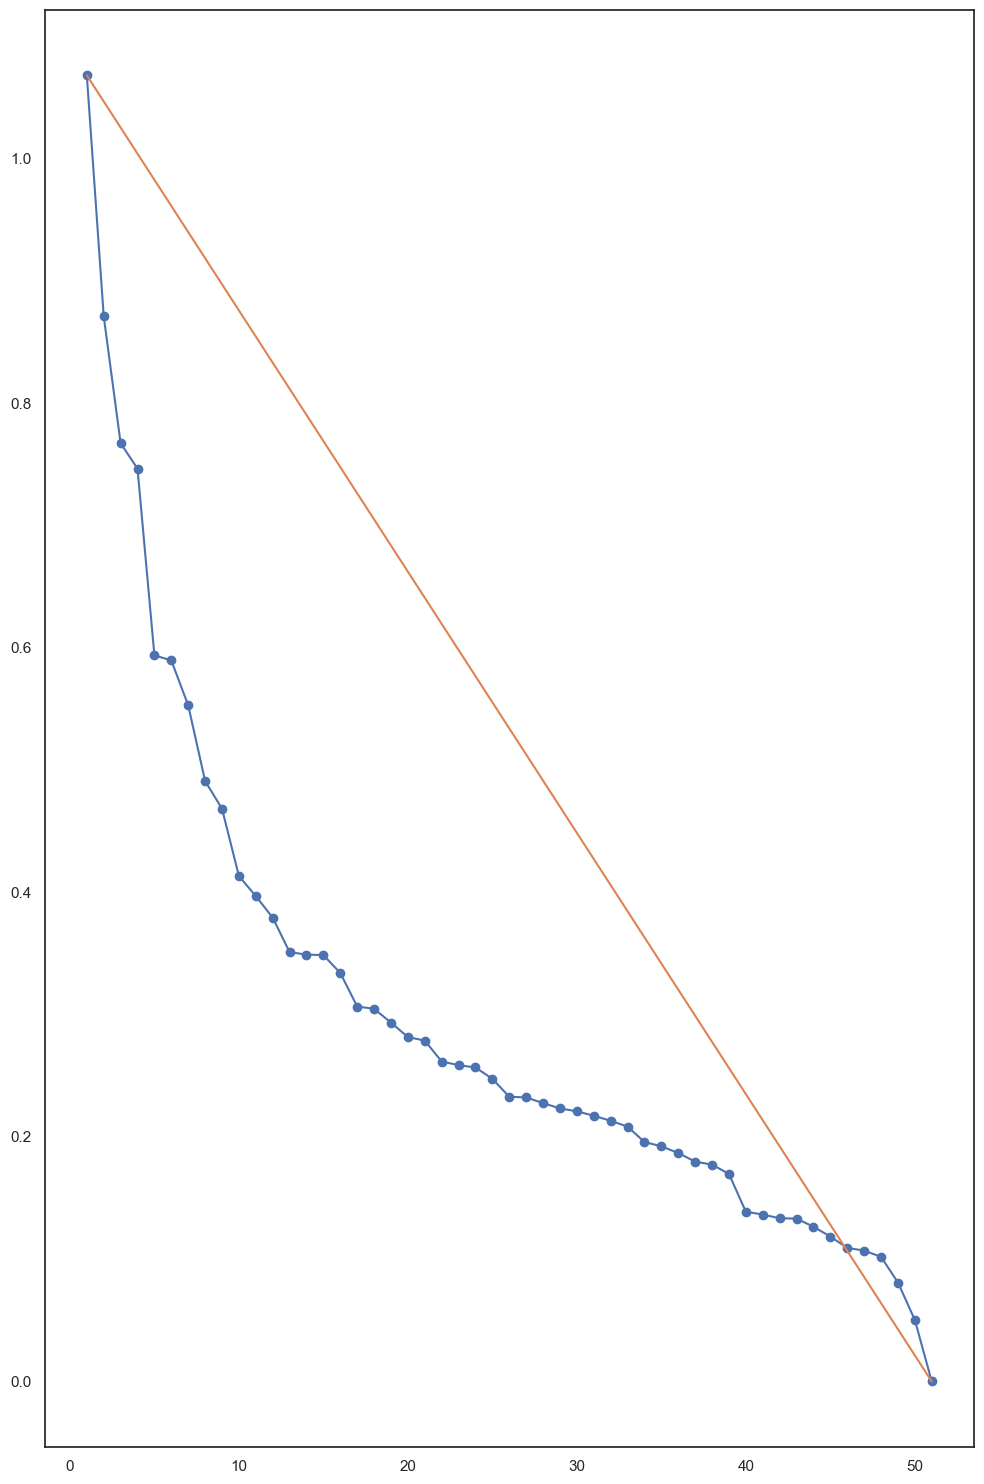

In [36]:
nb_alphabets = len(alphabets)

inertia = list(Z[::-1, 2])[: nb_alphabets - 1]
inertia.append(0)

fig, axes = plt.subplots(1, 1)
plt.scatter(range(1, nb_alphabets + 1), inertia)
axes.plot(range(1, nb_alphabets + 1), inertia)
axes.plot([1, nb_alphabets], [inertia[0], inertia[nb_alphabets - 1]])
plt.rcParams["figure.figsize"] = [15, 5]
plt.rcParams["figure.autolayout"] = True
plt.show()

We define functions to compute the elbow point of curves defined by explained variations.

In [37]:
def find_distance(p1, p2, p3):
    """Computes the distance of the point p3 to the line defined by the points p1 and p2."""
    nom = abs((p2[0] - p1[0]) * (p1[1] - p3[1]) - (p1[0] - p3[0]) * (p2[1] - p1[1]))
    denom = math.sqrt((p2[0] - p1[0]) ** 2 + (p2[1] - p1[1]) ** 2)
    return nom / denom


def elbow_point(inert):
    """Computes the elbow point of an explained variation list."""
    p1 = (1, inert[0])
    p2 = (len(inert), inert[len(inert) - 1])
    maxval = 0
    maxindice = 1
    for i in range(1, len(inert) + 1):
        p3 = (i, inert[i - 1])
        if find_distance(p1, p2, p3) > maxval:
            maxval = find_distance(p1, p2, p3)
            maxindice = i
    return maxindice

We compute all the elbow points by following the explained variation list through the evolution of the clustering.

In [38]:
max_list = []
for temp in range(2, nb_alphabets + 1):
    max_list.append(elbow_point(inertia[:temp]))

(unique, counts) = np.unique(max_list, return_counts=True)
max_dict = {x: y for x, y in zip(unique, counts)}
max_dict = dict(sorted(max_dict.items(), key=lambda item: item[1], reverse=True))

print("The elbow points through the evolution of the clustering:", max_list)
print(
    "The counting of the occurences of the elbow points through the evolution of the clustering:",
    max_dict,
)

The elbow points through the evolution of the clustering: [1, 2, 2, 2, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 13, 13, 10, 10]
The counting of the occurences of the elbow points through the evolution of the clustering: {10: 26, 5: 17, 2: 3, 13: 2, 1: 1, 3: 1}


## Clustering
As shown above, the Elbow method clearly indicates to truncate the dendrogram at 10 clusters. 

In [39]:
nb_clus = 10

clusters = fcluster(Z, nb_clus, criterion="maxclust")
clusters = clusters.tolist()
dict_clusters = {}
for i in range(1, nb_clus + 1):
    dict_clusters[i] = []
for i in range(len(clusters)):
    dict_clusters[clusters[i]].append(i)

list_clusters = [0] * len(alphabets)
for i in dict_clusters:
    for j in dict_clusters[i]:
        list_clusters[j] = "C" + str(i)

for i in dict_clusters:
    print(
        "cluster",
        i,
        [alphabets_short[j] for j in dict_clusters[i]],
        len([alphabets_short[j] for j in dict_clusters[i]]),
    )

cluster 1 ['Carian', 'Coptic', 'Cyrillic', 'Gothic', 'Greek', 'Latin', 'Lycian', 'Old Italic', 'Tifinagh'] 9
cluster 2 ['Armenian', 'Georgian Asomtavruli', 'Georgian Mkhedruli'] 3
cluster 3 ['Glagolitic'] 1
cluster 4 ['Cypriot', 'Cypro-Minoan', 'Linear B'] 3
cluster 5 ['Avestan', 'Ogham', 'Old Permic'] 3
cluster 6 ['Caucasian Albanian', 'Chorasmian', 'Hatran Aramaic', 'Hebrew', 'Imperial Aramaic', 'Kharoshthi', 'Lydian', 'Nabataean', 'Palmyrene', 'Parthian Inscriptional', 'Phoenician', 'Syriac', 'Ugaritic'] 13
cluster 7 ['Elder Futhark', 'Ge`ez', 'Old Hungarian', 'Old North Arabian', 'Old South Arabian', 'Old Turkic Orkhon', 'Old Turkic Yenisei'] 7
cluster 8 ['Arabic', 'Elymaic', 'Mandaic', 'Manichaean', 'Meroitic Cursive', 'Old Sogdian', 'Pahlavi Inscriptional', 'Pahlavi Psalter', 'Samaritan', 'Sogdian'] 10
cluster 9 ['Meroitic Hieroglyphs'] 1
cluster 10 ['Old Persian'] 1


## Dunn index

We compute the Dunn clustering quality index of this clustering.

In [40]:
def dist_intra_in_cluster(dict_dist, C):
    """Computes the distance in a cluster."""
    if len(C) == 1:
        return 0
    dist_tmp = []
    for i in range(len(C) - 1):
        for j in range(i + 1, len(C)):
            dist_tmp.append(dict_dist[(tuple(sorted((C[i], C[j]))))])
    return np.mean(dist_tmp)


def dist_between_clusters(dict_dist, C1, C2):
    """Computes the distance between two clusters."""
    temp = []
    for i in C1:
        for j in C2:
            temp.append(dict_dist[tuple(sorted((i, j)))])
    return np.mean(temp)


def Dunn(dict_dist, dict_clusters):
    """Computes the Dunn index of a clustering."""
    temp1 = []
    for i in dict_clusters:
        for j in dict_clusters:
            if i != j:
                temp1.append(
                    dist_between_clusters(dict_dist, dict_clusters[i], dict_clusters[j])
                )
    temp2 = []
    for i in dict_clusters:
        temp2.append(dist_intra_in_cluster(dict_dist, dict_clusters[i]))
    SD = min(temp1) / max(temp2)
    return SD


print("The Dunn index is", Dunn(dict_dist, dict_clusters))

The Dunn index is 0.8106029048433923


## Visualisation of the clustering
We now perform a two-dimensional scaling analysis of the scripts to visualize the clustering.

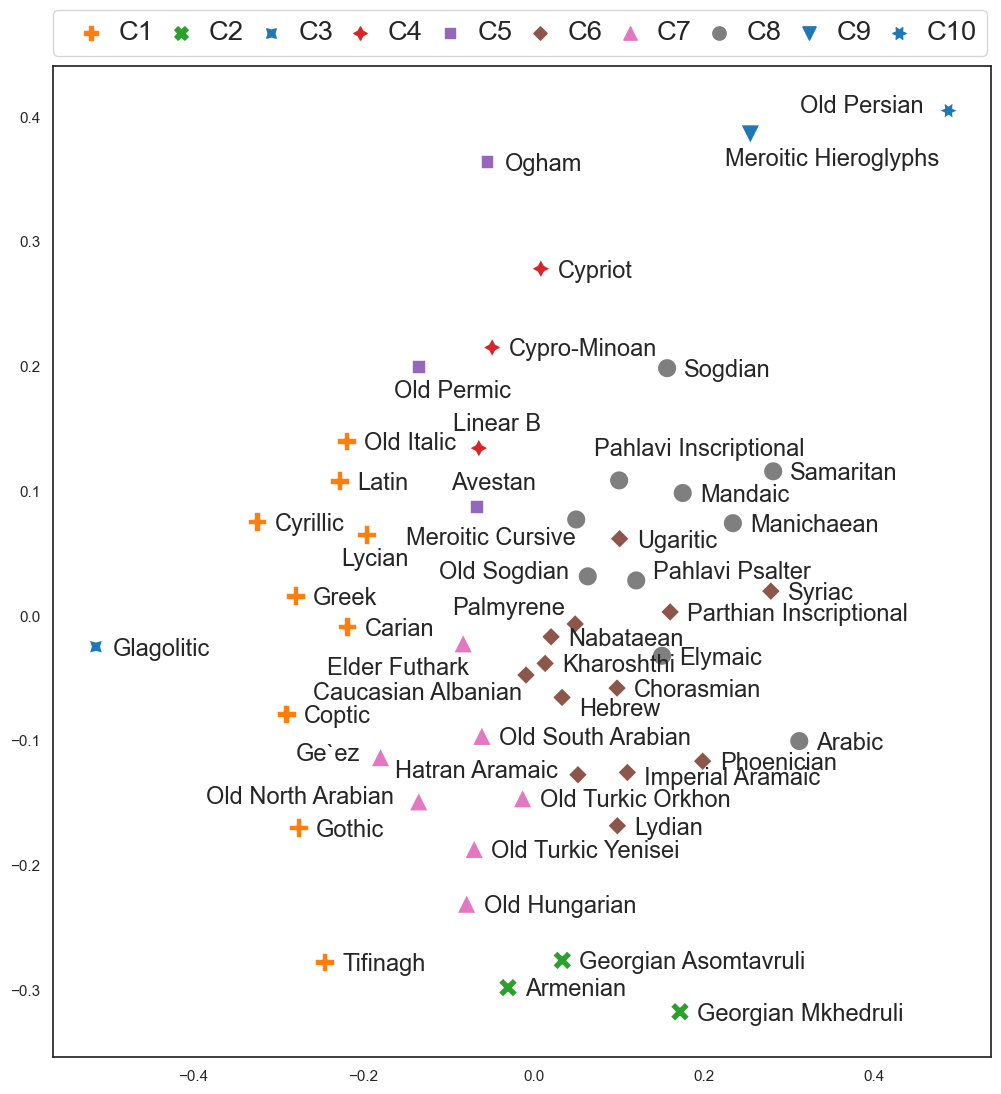

In [41]:
mat_dist = np.zeros((len(alphabets), len(alphabets)))
for i in range(len(alphabets)):
    for j in range(len(alphabets)):
        if i != j:
            mat_dist[i][j] = dict_dist[tuple(sorted((i, j)))]

mds = MDS(
    dissimilarity="precomputed",
    random_state=0,
    n_components=2,
    metric=True,
    normalized_stress=False,
)
mat_dist_MDS_2 = mds.fit_transform(mat_dist)

mat_dist_MDS_2_df = pd.DataFrame(
    data={
        "axis 1": mat_dist_MDS_2[:, 0],
        "axis 2": mat_dist_MDS_2[:, 1],
        "alphabets": alphabets_short,
        "Clusters": list_clusters,
    }
)

palette = {
    "C1": "tab:orange",
    "C2": "tab:green",
    "C3": "tab:blue",
    "C4": "tab:red",
    "C5": "tab:purple",
    "C6": "tab:brown",
    "C7": "tab:pink",
    "C8": "tab:grey",
    "C9": "tab:blue",
    "C10": "tab:blue",
}

orders = list(palette.keys())
sns.set(rc={"figure.figsize": (11, 11)}, font_scale=1.6)
sns.set_theme(style="white")

s = sns.scatterplot(
    x="axis 1",
    y="axis 2",
    data=mat_dist_MDS_2_df,
    hue="Clusters",
    s=200,
    style="Clusters",
    hue_order=orders,
    palette=palette,
)
s.legend(
    loc="upper left",
    bbox_to_anchor=(-0.015, 1.07),
    ncol=10,
    columnspacing=0.001,
    fontsize=19.7,
    handletextpad=0,
    markerscale=1.6,
)
s.set_ylabel("")
s.set_xlabel("")

offsets = {
    "Avestan": [-0.03, 0.014],
    "Caucasian Albanian": [-0.25, -0.02],
    "Elder Futhark": [-0.16, -0.025],
    "Ge`ez": [-0.1, -0.0027],
    "Hatran Aramaic": [-0.215, -0.0027],
    "Hebrew": [0.02, -0.015],
    "Imperial Aramaic": [0.02, -0.01],
    "Linear B": [-0.03, 0.014],
    "Lycian": [-0.03, -0.025],
    "Meroitic Cursive": [-0.2, -0.02],
    "Meroitic Hieroglyphs": [-0.03, -0.025],
    "Old North Arabian": [-0.25, -0.002],
    "Old Permic": [-0.03, -0.025],
    "Old Persian": [-0.175, -0.002],
    "Old Sogdian": [-0.175, -0.002],
    "Pahlavi Inscriptional": [-0.03, 0.02],
    "Pahlavi Psalter": [0.02, 0.001],
    "Palmyrene": [-0.145, 0.007],
}
for i in alphabets_short:
    if i not in offsets.keys():
        offsets[i] = [0.02, -0.007]

for i in range(0, len(mat_dist_MDS_2)):
    script = alphabets_short[i]
    plt.text(
        mat_dist_MDS_2_df["axis 1"][i] + offsets[script][0],
        mat_dist_MDS_2_df["axis 2"][i] + offsets[script][1],
        f"{script}",
        fontsize=17,
    )

# to save
plt.rcParams["savefig.dpi"] = 300
# plt.savefig("export.png", dpi=300, bbox_inches="tight")

plt.show()

## Cluster medoids
We compute the medoid of each cluster.

In [43]:
def medoid(C):
    """Exports the medoid of a cluster."""
    list_temp = []
    for i in C:
        temp = 0
        for j in C:
            if i != j:
                temp += dict_dist[tuple(sorted((i, j)))]
        list_temp.append(temp)
    return C[np.argmin(list_temp)]


def diameter(C):
    """Computes the diameter of a cluster."""
    if len(C) == 1:
        return 0
    temp = []
    for i in range(len(C) - 1):
        for j in range(i + 1, len(C)):
            temp.append(dict_dist[(C[i], C[j])])
    return max(temp)


def dist_mean(C):
    """Computes the mean distance in a cluster."""
    if len(C) == 1:
        return 0
    temp = []
    for i in range(len(C) - 1):
        for j in range(i + 1, len(C)):
            temp.append(dict_dist[(C[i], C[j])])
    return np.mean(temp)


list_size = []
list_medoid = []
list_diameter = []
list_mean_dist = []
list_cluster_num = []
for key in dict_clusters:
    list_cluster_num.append("C" + str(key))
    list_size.append(len(dict_clusters[key]))
    list_medoid.append(alphabets_short[medoid(dict_clusters[key])])
    list_diameter.append(diameter(dict_clusters[key]))
    list_mean_dist.append(dist_mean(dict_clusters[key]))

df = pd.DataFrame(
    {
        "Cluster": list_cluster_num,
        "Size": list_size,
        "Medoid": list_medoid,
        "Diameter": list_diameter,
        "Mean distance": list_mean_dist,
    }
)

pd.set_option("styler.format.precision", 2)
display(df.style.set_caption("Styler precision"))

,Cluster,Size,Medoid,Diameter,Mean distance
0,C1,9,Greek,0.41,0.28
1,C2,3,Georgian Asomtavruli,0.28,0.25
2,C3,1,Glagolitic,0.00,0.00
3,C4,3,Cypro-Minoan,0.29,0.26
4,C5,3,Avestan,0.43,0.31
5,C6,13,Nabataean,0.40,0.19
6,C7,7,Old South Arabian,0.34,0.23
7,C8,10,Pahlavi Psalter,0.43,0.21
8,C9,1,Meroitic Hieroglyphs,0.00,0.00
9,C10,1,Old Persian,0.00,0.00


# Bonus: three-dimensional scaling analysis of all the writing systems

We perform here a three-dimensional scaling analysis of all the scripts.
- This is additional and not present in the paper since three-dimensional plots are not well represented with screenshots. This visualization is interactive and visible by running the notebook.

In [44]:
mat_dist = np.zeros((len(alphabets), len(alphabets)))
for i in range(len(alphabets)):
    for j in range(len(alphabets)):
        if i != j:
            mat_dist[i][j] = dict_dist[tuple(sorted((i, j)))]

mds = MDS(
    dissimilarity="precomputed",
    random_state=0,
    n_components=3,
    normalized_stress=False,
    metric=True,
)
mat_dist_MDS_3 = mds.fit_transform(mat_dist)

mat_dist_MDS_3_df = pd.DataFrame(
    data={
        "axis 1": mat_dist_MDS_3[:, 0],
        "axis 2": mat_dist_MDS_3[:, 1],
        "axis 3": mat_dist_MDS_3[:, 2],
        "alphabets": alphabets_short,
        "clusters": list_clusters,
    }
)

fig = px.scatter_3d(
    mat_dist_MDS_3_df,
    x="axis 1",
    y="axis 2",
    z="axis 3",
    text="alphabets",
    color="clusters",
)
fig.update_layout(
    autosize=False,
    width=800,
    height=800,
)

fig.show()